# Scikit-learn Tutorial: Machine Learning in Python

This Jupyter Notebook is an updated version of the DataQuest tutorial by Satyabrata Pal (2018) found at https://www.dataquest.io/blog/sci-kit-learn-tutorial/. In addition to putting the tutorial in a Jupyter Notebook format, it updates the dataset `url` location since the original is no longer available. It also includes minor updates for new package versions and editorial corrections.  

## Requirements

This tutorial requires the third-party packages listed below. If you receive a `ModuleNotFoundError` error, you will need to install the missing package(s). You can enter the relevant `pip install package_name` commands into your terminal shell.

The tutorial was created on November 1, 2023, with the specified package versions. While newer versions may work, they could also result in error or warning messages. If such messages affect code execution or results, consider reverting to the versions used in this tutorial with `pip install package_name==version_number`.

+ Python 3.11.6: Must use 3.11 or earlier if you want Performance Comparison.
+ Matplotlib: `pip install matplotlib==3.6.3`
+ pandas: `pip install pandas==1.5.3`
+ Seaborn: `pip install seaborn==0.12.2`
+ scikit-learn: `pip install scikit-learn==1.5`
+ Yellowbrick: `pip install yellowbrick==1.5`

Note: Yellowbrick requires the Python standard module `distutils`, removed in Python 3.12.

The following code cell is optional and provided for diagnosing any error or warning messages. 

In [1]:
# OPTIONAL: Check your Python and package versions
import sys
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn as sk
import yellowbrick as yb

print(f"Python=={sys.version}")
print(f"Matplotlib=={mpl.__version__}")
print(f"pandas=={pd.__version__}")
print(f"Seaborn=={sns.__version__}")
print(f"scikit-learn=={sk.__version__}")
print(f"Yellowbrick=={yb.__version__}")

Python==3.11.6 (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit (AMD64)]
Matplotlib==3.8.1
pandas==2.1.2
Seaborn==0.13.0
scikit-learn==1.5
Yellowbrick==1.5


## Introduction

Scikit-learn is a free machine learning library for Python. It features various algorithms like support vector machine, random forests, and k-neighbors, and it also supports Python numerical and scientific libraries like `NumPy` and `SciPy`.

In this tutorial we will learn to code python and apply Machine Learning with the help of the scikit-learn library, which was created to make doing machine learning in Python easier and more robust.

To do this, we’ll be using the Sales_Win_Loss data set from IBM’s Watson repository. We will import the data set using pandas, explore the data using pandas methods like `head()`, `tail()`, `dtypes()`, and then try our hand at using plotting techniques from `Seaborn` to visualize our data.

Then we’ll dive into scikit-learn and use `preprocessing.LabelEncoder()` in scikit-learn to process the data, and `train_test_split()` to split the data set into test and train samples. We will also use a cheat sheet to help us decide which algorithms to use for the data set. Finally, we will use three different algorithms (Naive-Bayes, LinearSVC, K-Neighbors Classifier) to make predictions and compare their performance using methods like `accuracy_score()` provided by the scikit-learn library. We will also visualize the performance score of different models using scikit-learn and Yellowbrick visualization.

To get the most out of this post, you should probably already be comfortable with:

+ pandas fundamentals
+ Seaborn and matplotlib basics

If you need to brush up on these topics, check out these [pandas](https://www.dataquest.io/blog/pandas-python-tutorial/) and [data visualization](https://www.dataquest.io/blog/python-data-visualization-libraries/) blog posts.

## The data set
For this tutorial, we will use the Sales-Win-Loss data set originally from the IBM Watson website. This data set contains the sales campaign data of an automotive parts wholesale supplier.

We will use scikit-learn to build a predictive model to tell us which sales campaign will result in a loss and which will result in a win.

Let’s begin by importing the data set.

## Importing the data set


First we will import the pandas module and use a variable url to store the url from which the data set is to be downloaded.

In [2]:
#import necessary modules
import pandas as pd
#store the url in a variable
url = "https://raw.githubusercontent.com/ciioprof0/cybv474/2b6100661aec76b54c43127a07f9a2b0909af9b8/mod10/WA_Fn-UseC_-Sales-Win-Loss.csv"

# Note. The orignal data set url below is no longer valid.
#url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"

Next, we will use the read_csv() method provided by the pandas module to read the csv file which contains comma separated values and convert that into a pandas DataFrame.

In [3]:
# Read in the data with read_csv()
sales_data = pd.read_csv(url)

The code snippet above returns a variable sales_data where the dataframe is now stored.

For those who are new to pandas, the pd.read_csv() method in the above code creates a tabular data-structure known as a Dataframe, where the first column contains the index which marks each row of data uniquely and the first row contains a label/name for each column, which are the original column names retained from the data set. The sales_data variable in the above code snippet will have a structure similar to the diagram represented below.

![Figure 1. Pandas Dataframe Axes and Columns](https://www.dataquest.io/wp-content/uploads/2018/06/dataframe-1.png)

Source: [Stack Overflow](https://stackoverflow.com/questions/25773245/ambiguity-in-pandas-dataframe-numpy-array-axis-definition)

In the above diagram the row0, row1, row2 are the index for each record in the data set and the col0, col1, col2 etc. are the column names for each column(features) of the data set.

Now that we have downloaded the data set from its source and converted that into a pandas Dataframe, let’s display a few records from this dataframe. For this we will use the `head()` method.

In [4]:
# Using .head() method to view the first few records of the data set
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


As can be seen from the above display, the `head()` method shows us the first few records from the data set. The `head()` method is a very nifty tool provided by pandas that helps us to get a feel of the content of a data set. We will talk more about the `head()` method in the next section.

## Data Exploration


Now that we have got the data set downloaded and converted into a pandas dataframe, lets do a quick exploration of the data see what stories the data can tell us so that we can plan our course of action.

Data exploration is a very important step in any Data Science or Machine Learning project. Even a quick exploration of the data set can give us important information that we might otherwise miss, and that information can suggest important questions we can try to answer through our project.

For exploring the data set, we will use some third party Python libraries to help us process the data so that it can be effectively used with scikit-learn’s powerful algorithms. But we can start with the same `head()` method we used in the previous section to view the first few records of the imported data set, because `head()` is actually capable of doing much more than that! We can customize the `head()` method to show only a specific number of records as well:

In [5]:
# Using head() method with an argument which helps us to restrict the number of initial records that should be displayed
sales_data.head(n=2)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1


In the code snippet above, we used an argument inside the `head()` method to display only the first two records from our data set. The integer ‘2’ in the argument `n=2` actually denotes the second `index` of the Dataframe `sales_data`. Using this we can get a quick look into the kind of data we have to work with. For example, we can see that columns like ‘Supplies Group’ and ‘Region’ contain string data, while columns like Opportunity Result, Opportunity Number etc. contain integers. Also, we can see that the ‘Opportunity Number’ column contains unique identifiers for each record.

Now that we have viewed the initial records of our dataframe, let’s try to view the last few records in the data set. This can be done using the `tail()` method, which has similar syntax as the `head()` method. Let’s see what the `tail()` method can do:

In [6]:
# Using .tail() method to view the last few records from the dataframe
sales_data.tail()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
78020,10089932,Batteries & Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,250000,1,1,3,Unknown,0.0,0.0,0.0,6
78021,10089961,Shelters & RV,Performance & Non-auto,Northeast,Reseller,0,Won,1,0,0,180000,1,1,0,Unknown,0.0,0.0,0.0,5
78022,10090145,Exterior Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.0,0.0,0.0,5
78024,10094255,Interior Accessories,Car Accessories,Mid-Atlantic,Reseller,0,Loss,1,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4


The `tail()` method in the code snippet above returns us the last few records from the dataframe `sales_dat`a. We can pass an argument to the `tail()` method to view only a limited number of records from our dataframe, too:

In [7]:
# Using .tail() method with an argument which helps us to restrict the number of initial records that should be displayed
sales_data.tail(n=2)

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.0,0.0,0.0,5
78024,10094255,Interior Accessories,Car Accessories,Mid-Atlantic,Reseller,0,Loss,1,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4


We can now view only the last two records from the dataframe, as indicated by the argument `n=2` inside the `tail()` method. Similar to the `head()` method, the integer ‘2’ in the argument `n=2` in the `tail()` method points to the second index from the last two records in the data set `sales_data`.

What story do these last two records tell us? Looking at the ‘Opportunity Number’ column of the trailer records from the dataframe, it becomes clear to us that a total of 78,024 records are available. This is evident from the ‘index’ number of the records displayed with the `tail()` method.

Now, it would be good if we could see the different datatypes that are available in this data set; this information can be handy in case we need to do some conversion later on. We can do that with the `dtypes()` method in pandas:

In [8]:
# using the dtypes() method to display the different datatypes available
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

As we can see in the code snippet above, using the `dtypes` method, we can list the different columns available in the Dataframe along with their respective data types. For example, we can see that the Supplies Subgroup column is an `object` datatype and the ‘Client Size By Revenue’ column is an `integer` datatype. So, now we know which columns have integers in them and which columns have string data in them.

## Data Visualization

Now that we’ve done some basic data exploration, let’s try to create some nice plots to visually represent the data and uncover more stories hidden in the data set.

There are many python libraries that provide functions for doing data visualization; one such library is `Seaborn`. To use `Seaborn` plots, we should make sure that this python module is downloaded and installed.

If you need to install `Seaborn`, use `pip install seaborn` in your terminal shell.

Let’s set up the code to use the `Seaborn` module:

0.13.0


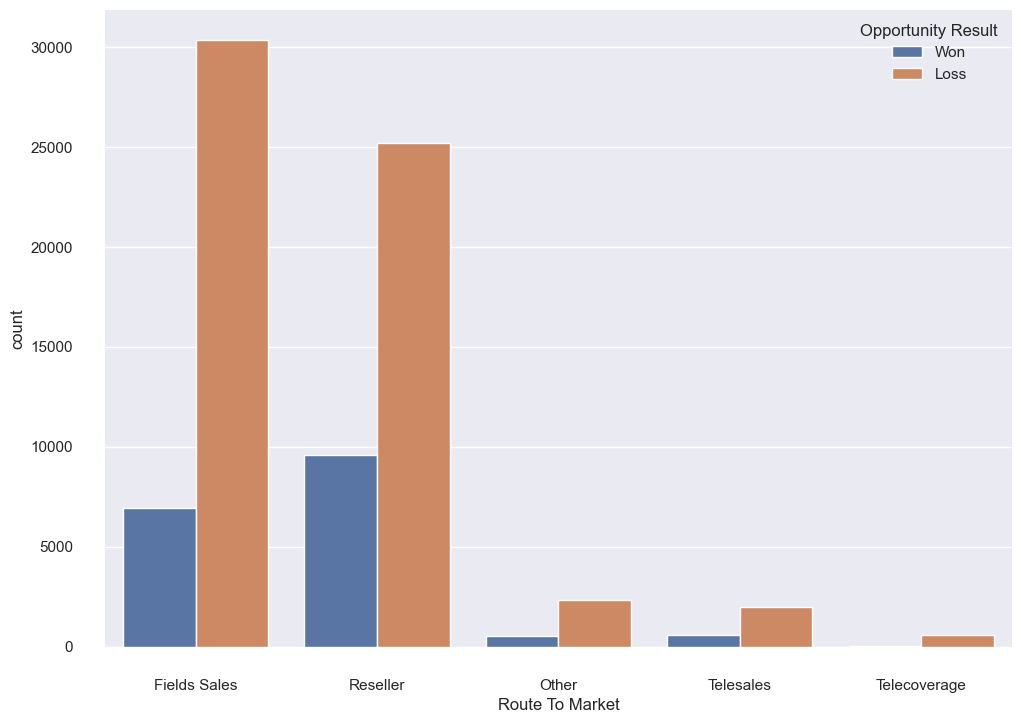

In [9]:
# import the seaborn module
import seaborn as sns
# Note: Check the version of seaborn to help diagnose errors.
print(sns.__version__)
# import the matplotlib module
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
# create a countplot
# Note: If sns version <= 0.9, then uncomment the following line
#sns.countplot('Route To Market',data=sales_data,hue = 'Opportunity Result')
# Note: If sns version > 0.9, then uncomment the following line
sns.countplot(x='Route To Market',data=sales_data,hue = 'Opportunity Result')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plotplt.show()

Now that we’ve got Seaborn set up, let’s take a deeper look at what we just did.

First we imported the Seaborn module and the matplotlib module. The `set()` method in the next line helps to set different properties for our plot, like ‘styles’, ‘color’ etc. Using the `sns.set(style="whitegrid", color_codes=True)` code snippet we set the background of the plot to a light color. Then we set the plot size with the `sns.set(rc={'figure.figsize':(11.7,8.27)})` code snippet, which defines the plot figure size to be 11.7px and 8.27px.

Next, we create the plot using `sns.countplot(x='Route To Market',data=sales_data,hue = 'Opportunity Result')`. The `countplot()` method helps us to create a countplot, and it exposes several arguments to customize the countplot per our needs. Here, in the first argument of the `countplot()` method, we defined the X-axis as the column ‘Route To Market’ from our data set. The second argument is the data source, which in this case is the dataframe `sales_data` that we created in the first section of this tutorial. The third argument is the color of the barplots which we assigned to ‘blue’ for the label ‘won’ and ‘green’ for the label ‘loss’ from the ‘Opportunity Result’ column of the `sales_data` dataframe.

More details about Seaborn countplots can be found [here](https://seaborn.pydata.org/generated/seaborn.countplot.html).

So, what does the countplot tell us about the data? The first thing is that the data set has more records of the type ‘loss’ than records of the type ‘won’, as we can see from the size of the bars. Looking at the x-axis and the corresponding bars for each label on the x-axis, we can see that most of the data from our data set is concentrated on the left side of the plot: towards the ‘Field Sales’ and ‘Reseller’ categories. Another thing to notice is that the category ‘Field Sales’ has more losses than the category ‘Reseller’.

We selected the Route To Market column for our plot because it seemed like it would provide helpful information after our initial study of the `head()` and `tail()` methods’ output. But other fields like ‘Region’, ‘Supplies Group’ etc. can also be used to make plots in the same manner.

Now that we have got a pretty good visualization of what our overall data looks like, let’s see what more information can we dig out with the help of other Seaborn plots. Another popular option is violinplots, so let’s create a violin plot and see what that style of plot can tell us.

We will use the `violinplot()` method provided by the Seaborn module to create the violin plot. Let’s first import the `seaborn` module and use the set() method to customize the size of our plot. We will set the size of the plot as 16.7px by 13.27px:

In [10]:
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(16.7,13.27)})

Next, we will use the `violinplot()` method to create the violin plot and then use the `show()` method to display the plot–

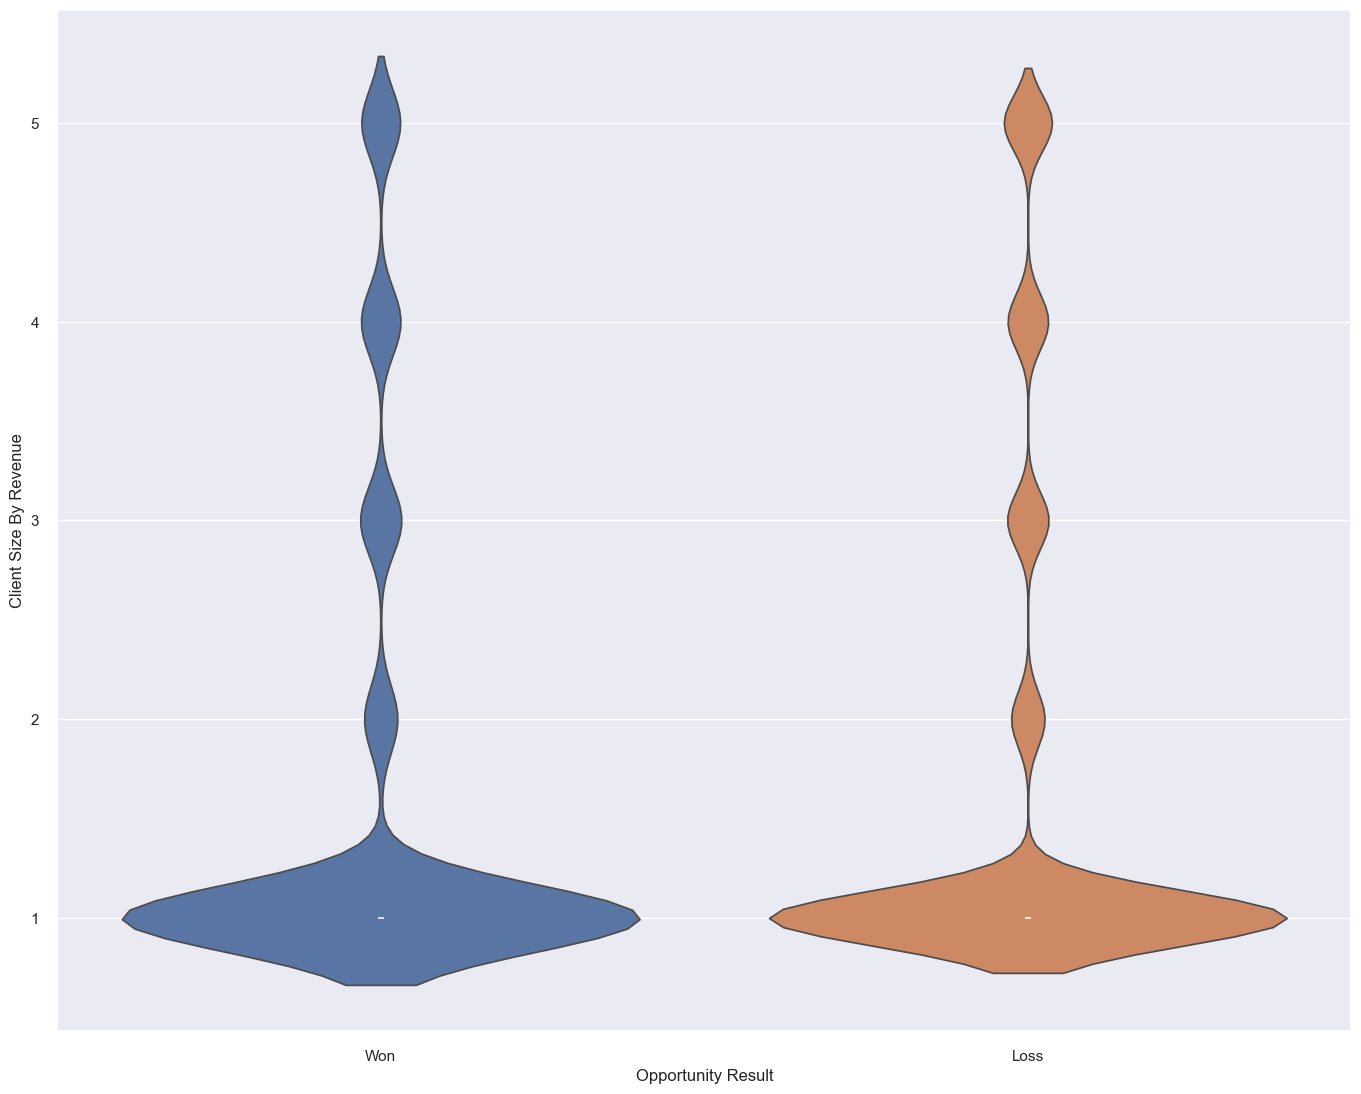

In [11]:
# plotting the violinplot
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()

Now, that our plot is created, let’s see what it tells us. In its simplest form, a violin plot displays the distribution of data across labels. In the above plot we have labels ‘won’ and ‘loss’ on the x-axis and the values of ‘Client Size By Revenue’ in the y-axis. The violin plot shows us that the largest distribution of data is in the client size ‘1’, and the rest of the client size labels have fewer data.

This violin plot gives us very valuable insight into how the data is distributed and which features and labels have the largest concentration of data, but there is more than what meets the eye in case of violin plots. You can dig deeper into the additional uses of violin plots via [the official documentation of the Seaborn module](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

## Preprocessing Data

Now that we have a good understanding of what our data looks like, we can move towards preparing it to build prediction models using scikit-learn.

We saw in our initial exploration that most of the columns in our data set are strings, but the algorithms in scikit-learn understand only numeric data. Luckily, the scikit-learn library provides us with many methods for converting string data into numerical data. One such method is the `LabelEncoder()` method. We will use this method to convert the categorical labels in our data set like ‘won’ and ‘loss’ into numerical labels. To visualize what we are trying to achieve with the `LabelEncoder()` method let’s consider the images below.

The image below represents a dataframe that has one column named ‘color’ and three records ‘Red’, ‘Green’ and ‘Blue’.

![Figure 2. Dataframe Before Encoding](https://www.dataquest.io/wp-content/uploads/2018/06/dataframe_before-1.png)

Since the machine learning algorithms in scikit-learn understand only numeric inputs, we would like to convert the categorical labels like ‘Red, ‘Green’ and ‘Blue’ into numeric labels. When we are done converting the categorical labels in the original dataframe, we would get something like this:

![Figure 3. Dataframe After Encoding](https://www.dataquest.io/wp-content/uploads/2018/06/dataframe_after-1.png)

Now, let’s start the actual conversion process. We will use the fit_transform() method provided by `LabelEncoder()` to encode the labels in the categorical column such as ‘Route To Market’ in the sales_data dataframe and convert them into numeric labels similar to what we visualized in the above diagrams. The fit_transform() function takes user defined labels as input and then returns encoded labels. Let’s go through a quick example to understand how the encoding is done. In the code example below we have a list of cities i.e. ["paris", "paris", "tokyo", "amsterdam"] and we will try to encode these string labels into something similar to this – [2, 2, 1,3].

In [12]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])
print(encoded_value)

[1 1 2 0]


Voilà! We have successfully converted the string labels into numeric labels. How’d we do that? First we imported the preprocessing module which provides the `LabelEncoder()` method. Then we created an object which represents the `LabelEncoder()` type. Next we used this object’s fit_transform() function to differentiate between different unique classes of the list ["paris", "paris", "tokyo", "amsterdam"] and then return a list with the respective encoded values, i.e. [1 1 2 0].

Notice how the `LabelEncoder()` method assigns the numeric values to the classes in the order of the first letter of the classes from the original list: “(a)msterdam” gets an encoding of ‘0’, “(p)aris gets an encoding of 1” and “(t)okyo” gets an encoding of 2.

There are many more functions provided by `LabelEncoder()` that are handy under a variety of encoding requirements. We won’t need them here, but to learn more, a good place to start is [the official page of scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) where the `LabelEncoder()` and its related functions are described in detail.

Since, we now have a good idea of how the `LabelEncoder()` works, we can move forward with using this method to encode the categorical labels from the `sales_data` dataframe and convert them into numeric labels. In the previous sections during the initial exploration of the data set we saw that the following columns contain string values: ‘Supplies Subgroup’, ‘Region’, ‘Route To Market’, ‘Opportunity Result’, ‘Competitor Type’, and ‘Supplies Group’. Before we start encoding these string labels, let’s take a quick look into the different labels that these columns contain:-

In [13]:
# Note: The orignal tutorial code had inconsistent quotation marks and did not
#       use f-strings. The updated code below corrects these issues.
print(f"Supplies Subgroup: {sales_data['Supplies Subgroup'].unique()}")
print(f"Region: {sales_data['Region'].unique()}")
print(f"Route To Market: {sales_data['Route To Market'].unique()}")
print(f"Opportunity Result: {sales_data['Opportunity Result'].unique()}")
print(f"Competitor Type: {sales_data['Competitor Type'].unique()}")
print(f"Supplies Group: {sales_data['Supplies Group'].unique()}")

Supplies Subgroup: ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']
Region: ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']
Route To Market: ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']
Opportunity Result: ['Won' 'Loss']
Competitor Type: ['Unknown' 'Known' nan]
Supplies Group: ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


We have now laid out the different categorical columns from the `sales_data` dataframe and the unique classes under each of these columns. Now, it’s time to encode these strings into numeric labels. To do this, we will run the code below and then do a deep dive to understand how it works:

In [14]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])
#display the initial records
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,1,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,1,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,1,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,1,0.00000,0.141125,0.000000,4


So what did we just do? First we imported the preprocessing module which provides the `LabelEncoder()` method. Then we created an object `le` of the type `labelEncoder()`. In the next couple of lines we used the `fit_transform()` function provided by `LabelEncoder()` and converted the categorical labels of different columns like ‘Supplies Subgroup’, ‘Region’, Route To Market’ into numeric labels. In doing this, we successfully converted all the categorical (string) columns into numeric values.

Now that we have our data prepared and converted it is _almost_ ready to be used for building our predictive model. But we still need to do one critical thing:

## Training Set & Test Set

A Machine Learning algorithm needs to be trained on a set of data to learn the relationships between different features and how these features affect the target variable. For this we need to divide the entire data set into two sets. One is the training set on which we are going to train our algorithm to build a model. The other is the testing set on which we will test our model to see how accurate its predictions are.

But before doing all this splitting, let’s first separate our features and target variables. As before in this tutorial, we will first run the code below, and then take a closer look at what it does:

In [15]:
# Select columns other than 'Opportunity Number','Opportunity Result'
cols = [col for col in sales_data.columns if col not in
        ['Opportunity Number','Opportunity Result']
        ]
data = sales_data[cols]
# Assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']
data.head(n=2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,1,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,1,0.00000,1.000000,0.000000,1


OK, so what did we just do? First, we don’t need the ‘Opportunity Number’ column as it is just a unique identifier for each record. Also, we want to predict the ‘Opportunity Result’, so it should be our ‘target’ rather than part of ‘data’. So, in the first line of the code above, we selected only the columns which didn’t match ‘Opportunity Number’and ‘Opportunity Result’ and assigned them to a variable `cols`. Next, we created a new dataframe `data` with the columns in the list cols. This will serve as our feature set. Then we took the ‘Opportunity Result’ column from the dataframe sales_data and created a new dataframe `target`.

That’s it! We are all set with defining our features and target into two separate dataframes. Next we will divide the dataframes `data` and `target` into training sets and testing sets. When splitting the data set we will keep 30% of the data as the test data and the remaining 70% as the training data. But keep in mind that those numbers are arbitrary, and the best split will depend on the specific data you’re working with. If you’re not sure how to split your data, the 80/20 principle where you keep 80% of the data as training data and use the remaining 20% as test data is a decent default. However, for this tutorial, we are going to stick with our earlier decision of keeping aside 30% of the data as test data. The `train_test_split()` method in scikit-learn can be used to split the data:

In [16]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

With this, we have now successfully prepared a testing set and a training set. In the above code first we imported the train_test_split module. Next we used the `train_test_split()` method to divide the data into a training set (data_train, target_train) and a test set (data_test, data_train). The first argument of the `train_test_split()` method are the features that we separated out in the previous section, the second argument is the target(‘Opportunity Result’). The third argument ‘test_size’ is the percentage of the data that we want to separate out as training data. In our case it’s 30%, although this can be any number. The fourth argument ‘random_state’ just ensures that we get reproducible results every time.

Now, we have everything ready and here comes the most important and interesting part of this tutorial: building a prediction model using the vast library of algorithms available through scikit-learn.

## Building the Model

There’s a machine learning map available on scikit-learn’s website that we can use as a quick reference when choosing an algorithm. It looks something like this:

![Figure 4. Scikit-learn Algorithm Cheat Sheet](https://scikit-learn.org/stable/_static/ml_map.png)

We can use this map as a cheat sheet to shortlist the algorithms that we can try out to build our prediction model. Using the checklist let’s see under which category we fall:

+ More than 50 samples – Check
+ Are we predicting a category – Check
+ We have labeled data? (_data with clear names like opportunity amount etc._) – Check
+ Less than 100k samples – Check

Based on the checklist that we prepared above and going by the machine learning map we can try out the below-mentioned algorithms.

+ Naive Bayes
+ Linear SVC
+ K-neighbors Classifier

The real beauty of the scikit-learn library is that it exposes high level APIs for different algorithms, making it easier for us to try out different algorithms and compare the accuracy of the models to see what works best for our data set.

Let’s begin trying out the different algorithms one by one.

### Naive-Bayes

Scikit-learn provides a set of classification algorithms which “naively” assumes that in a data set every pair of features are independent. This assumption is the underlying principle of Bayes theorem. The algorithms based on this principle are known as Naive-Bayes algorithms.

On a very high level a Naive-Bayes algorithm calculates the probability of the connection of a feature with a target variable, and then it selects the feature with the highest probability. Let’s try to understand this with a very simple problem statement: Will it rain today? Suppose we have a set of weather data with us that will be our feature set, and the probability of ‘Rain’ will be our target. Based on this feature set we can create a table to show us the number of times a particular feature/target pair occur. It would look something like this:

![Figure 5. Naive Bayes Occurrences Table](https://www.dataquest.io/wp-content/uploads/2018/06/NB_occurancetable-1.png)

In the table above the feature (column) ‘Weather’ contains the labels (‘Partially Cloudy’ and ‘Cloudy’) and the column ‘Rain’ contains the occurrence of rain coinciding with the feature ‘Weather’ (Yes/No). Whenever a feature coincides with rain, it’s recorded as a ‘Yes’ and when the feature didn’t lead to rain it is recorded as a ‘No’. We can now use the data from the occurrence table to create another table known as the ‘Frequency table’ where we can record the number of ‘Yes’ and the number of ‘No’ answers that each feature relates to:

![Figure 6. Naive Bayes Frequency Table](https://www.dataquest.io/wp-content/uploads/2019/01/Frequency_Table-1.png)

Finally, we combine the data from the ‘occurrence table’ and the ‘frequency table’ and create a ‘likelihood table’. This table lists the amount of ‘Yes’ and ‘No’ for each feature and then uses this data to calculate the probability of contribution of each feature towards the occurrence of rain:

![Figure 7. Naive Bayes Probability Table](https://www.dataquest.io/wp-content/uploads/2019/01/Probability_Table.png)

Notice the ‘Individual Probability’ column in the table above. We had 6 occurrences of the features ‘Partially Cloudy’ and ‘Cloudy’ from the ‘Occurrence table’ and from the ‘Likelihood table’ it was clear that the feature ‘Partially Cloudy’ had 4 occurrences (2 for ‘No’ and 2 for ‘yes’). When we divide the number of occurrences of ‘No’ and ‘Yes’ of a particular feature with the ‘total’ of the ‘occurrence table’, we get the probability of that particular feature. In our case if we need to find out that which feature has the strongest probability of contributing to the occurrence of Rain then we take the total number of ‘No’ of each feature and add it to their respective number of ‘Yes’ from the ‘frequency table’ and then divide the sum with the ‘Total’ from the occurrences' table’. This gives us the probability of each of these features coinciding with rain.

The algorithm that we are going to use for our sales data is the Gaussian Naive Bayes, and it is based on a concept similar to the weather example we just explored above, although significantly more mathematically complicated. A more detailed explanation of ‘Naive-Bayes’ algorithms can be found [here](https://scikit-learn.org/stable/modules/naive_bayes.html) for those who wish to delve deeper.

Now let’s implement the Gaussian Naive Bayes or `GaussianNB` algorithm from scikit-learn to create our prediction model:

In [17]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.7592276144907724


Now let’s take a closer look at what we just did. First, we imported the `GaussianNB` method and the accuracy_score method. Then we created an object `gnb` of the type `GaussianNB`. After this, we trained the algorithm on the testing data(data_train) and testing target(target_train) using the fit() method, and then predicted the targets in the test data using the `predict()` method. Finally, we printed the score using the accuracy_score() method and with this we have successfully applied the Naive-Bayes algorithm to build a prediction model.

Now let's see how the other algorithms in our list perform as compared to the Naive-Bayes algorithm.

### LinearSVC

`LinearSVC` or Linear Support Vector Classification is a subclass of the SVM (Support Vector Machine) class. We won’t go into the intricacies of the mathematics involved in this class of algorithms, but on a very basic level `LinearSVC` tries to divide the data into different planes so that it can find the best possible grouping of different classes. To get a clear understanding of this concept let’s imagine a data set of ‘dots’ and ‘squares’ divided into a two-dimensional space along two axes, as shown in the image below:

![Figure 8. Naive Bayes Probability Table](https://www.dataquest.io/wp-content/uploads/2018/06/SVM-1.png)

Source: [Stack Overflow](https://stats.stackexchange.com/questions/23391/how-does-a-support-vector-machine-svm-work)

In the image above a `LinearSVC` implementation tries to divide the two-dimensional space in such a way that the two classes of data i.e., the dots and squares are clearly divided. Here the two lines visually represent the various division that the `LinearSVC` tries to implement to separate out the two available classes.

A very good write-up explaining a Support Vector Machine (SVM) can be found [here](https://stats.stackexchange.com/questions/23391/how-does-a-support-vector-machine-svm-work) for those who’d like more detail, but for now, let’s just dive in and get our hands dirty:

In [18]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0, dual='auto')
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.772001025290499


Similar to what we did during the implementation of `GaussianNB`, we imported the required modules in the first two lines. Then we created an object `svc_model` of type `LinearSVC` with random_state as ‘0’. Hold on! What is a “random_state” ? Simply put the `random_state` is an instruction to the built-in random number generator to shuffle the data in a specific order.

Next, we trained the `LinearSVC` on the training data and then predicted the target using the test data. Finally, we checked the accuracy score using the `accuracy_score()` method.

Now that we have tried out the `GaussianNB` and `LinearSVC` algorithms we will try out the last algorithm in our list and that’s the K-nearest neighbors classifier

### K-Neighbors Classifier

Compared to the previous two algorithms we’ve worked with, this classifier is a bit more complex. For the purposes of this tutorial we are better off using the `KNeighborsClassifier` class provided by scikit-learn without worrying much about how the algorithm works. (But if you’re interested, a very detailed explanation of this class of algorithms can be found [here](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm))

Now, let’s implement the K-Neighbors Classifier and see how it scores:

In [19]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.814636021872864


The above code can be explained just like the previous implementations. First we imported the necessary modules, then we created the object `neigh` of type `KNeighborsClassifier` with the number of neighbors being `n_neighbors=3`. Then we used the `fit()` method to train our algorithm on the training set, then we tested the model on the test data. Finally, we printed out the accuracy score.

Now that we have implemented all the algorithms in our list, we can simply compare the scores of all the models to select the model with the highest score. But wouldn’t it be nice if we had a way to visually compare the performance of the different models? We can use the `yellowbrick` library in scikit-learn, which provides methods for visually representing different scoring methods.

## Performance Comparison

In the previous sections we have used the `accuracy_score()` method to measure the accuracy of the different algorithms. Now, we will use the `ClassificationReport` class provided by the `Yellowbrick` library to give us a visual report of how our models perform.

### GaussianNB

Let’s start off with the `GaussianNB` model:

Note that you may receive a warning message running the code cell below. It is expected. There is a known issue with Yellowbrick and scikit-learn 1.0 and later. However, this should not affect code execution or results.

C:\Users\mikebenson\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


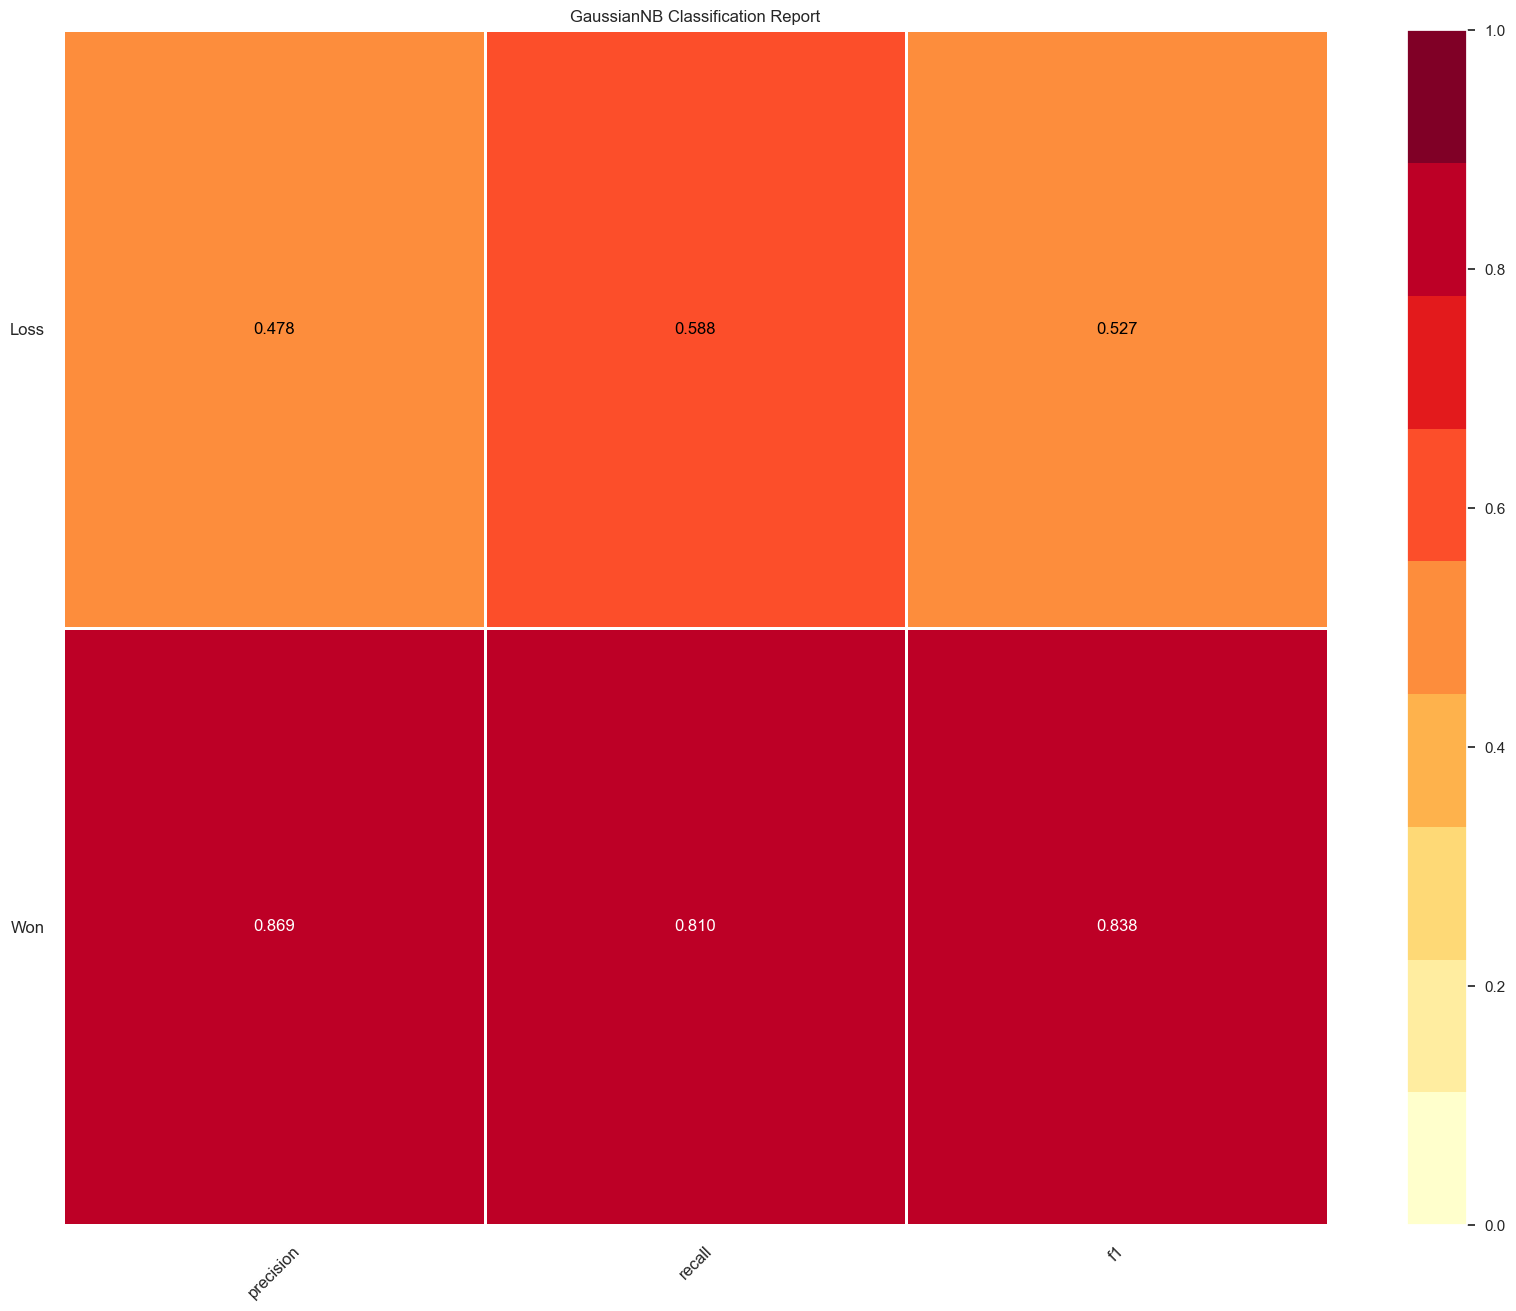

In [20]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Won','Loss'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In the code above, first we import the `ClassificationReport` class provided by the `yellowbrick.classifier` module. Next, an object visualizer of the type `ClassificationReport` is created. Here the first argument is the `GaussianNB` object `gnb` that was created while implementing the Naive-Bayes algorithm in the ‘Naive-Bayes’ section. The second argument contains the labels ‘Won’ and ‘Loss’ from the ‘Opportunity Result’ column from the `sales_data` dataframe.

Next, we use the `fit()` method to train the visualizer object. This is followed by the `score()` method, which uses `gnb` object to carry out predictions as per the `GaussianNB` algorithm and then calculate the accuracy score of the predictions made by this algorithm. Finally, we use the `poof()` method to draw a plot of the different scores for the `GaussianNB` algorithm. Notice how the different scores are laid out against each of the labels ‘Won’ and ‘Loss’; this enables us to visualize the scores across the different target classes.

### LinearSVC

Similar to what we just did in the previous section, we can also plot the accuracy scores of the `LinearSVC` algorithm:

Note that you may receive a warning message running the code cell below. It is expected. There is a known issue with Yellowbrick and scikit-learn 1.0 and later. However, this should not affect code execution or results.

C:\Users\mikebenson\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


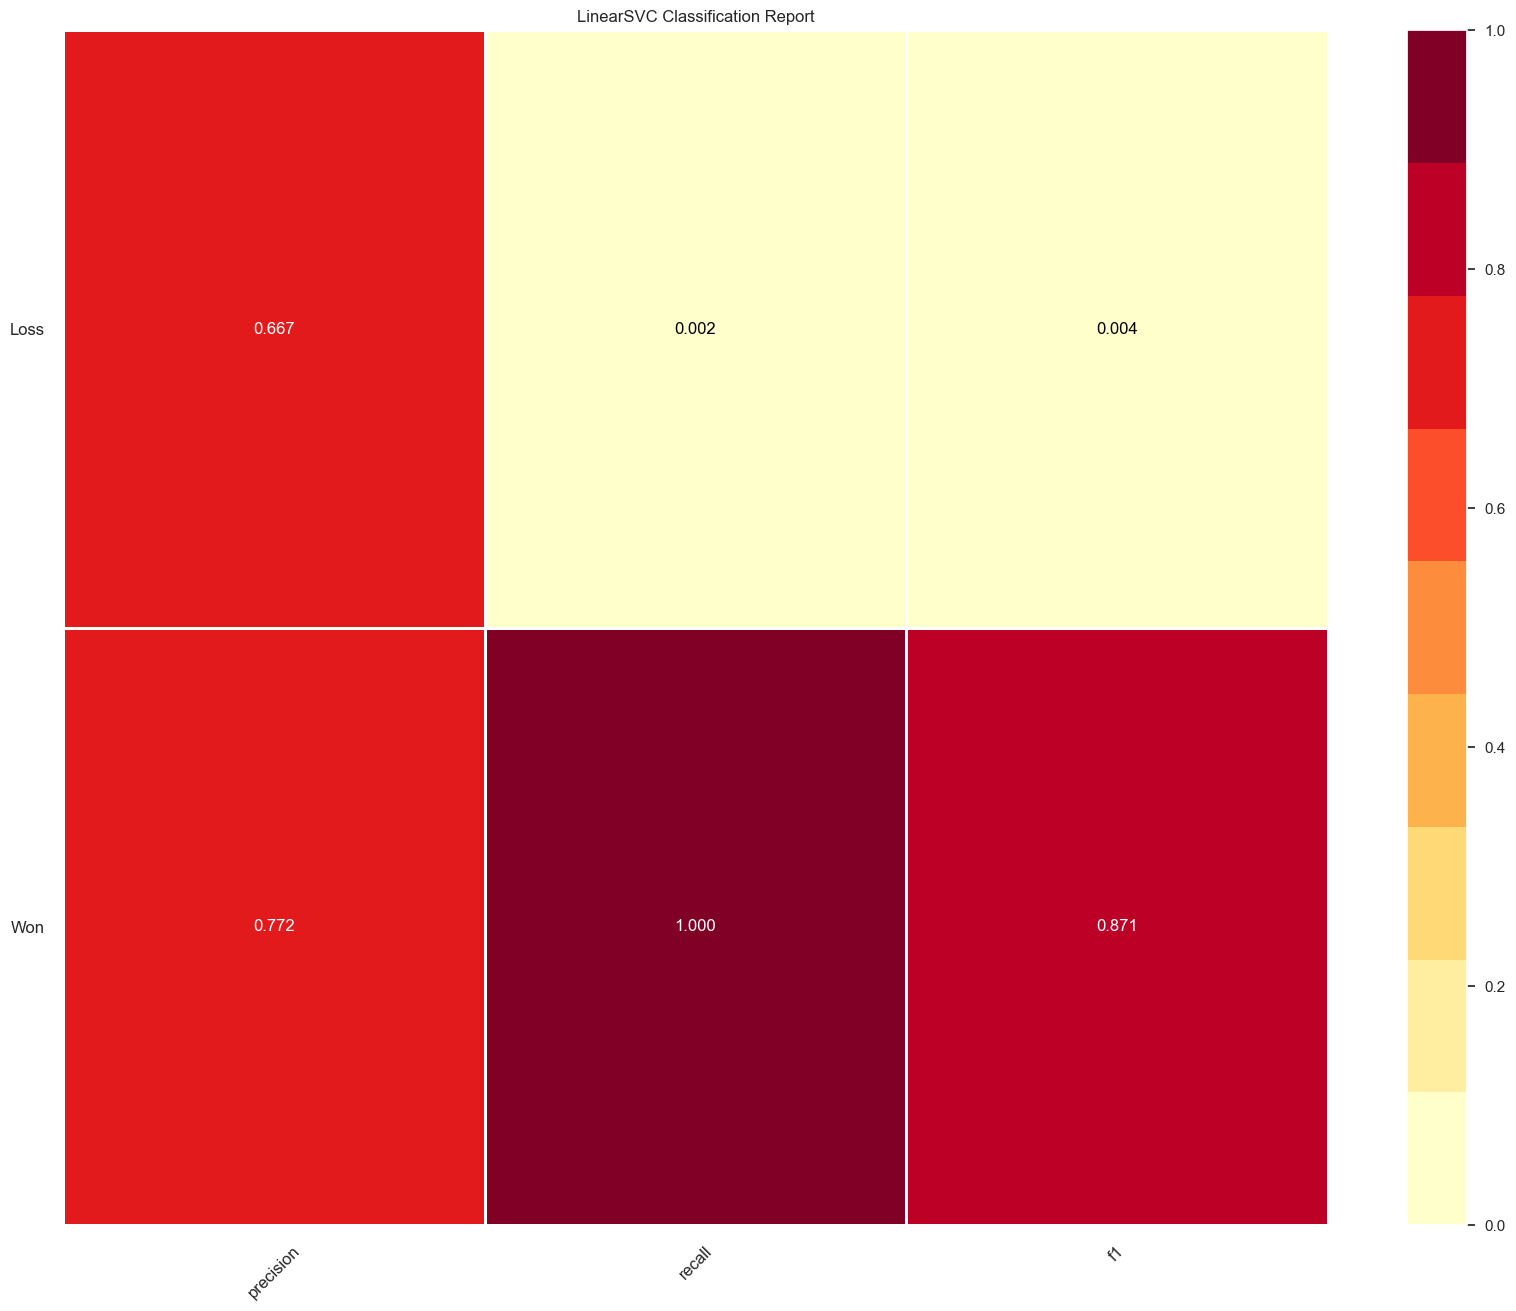

In [21]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Won','Loss'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In the code above, first we imported the `ClassificationReport` class provided by the `yellowbrick.classifier` module. Next, an object visualizer of the type `ClassificationReport` was created. Here the first argument is the `LinearSVC` object `svc_model`, that was created while implementing the `LinearSVC` algorithm in the ‘LinearSVC’ section. The second argument contains the labels ‘Won’ and ‘Loss’ from the ‘Opportunity Result’ column from the sales_data dataframe.

Next, we used the fit() method to train the ‘svc_model’ object. This is followed by the score() method which uses the `svc_model` object to carry out predictions according to the `LinearSVC` algorithm and then calculate the accuracy score of the predictions made by this algorithm. Finally, we used the poof() method to draw a plot of the different scores for the `LinearSVC` algorithm.

### KNeighborsClassifier

Now, let’s do the same thing for the K-Neighbors Classifier scores. 

Note that you may receive a warning message running the code cell below. It is expected. There is a known issue with Yellowbrick and scikit-learn 1.0 and later. However, this should not affect code execution or results.

C:\Users\mikebenson\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


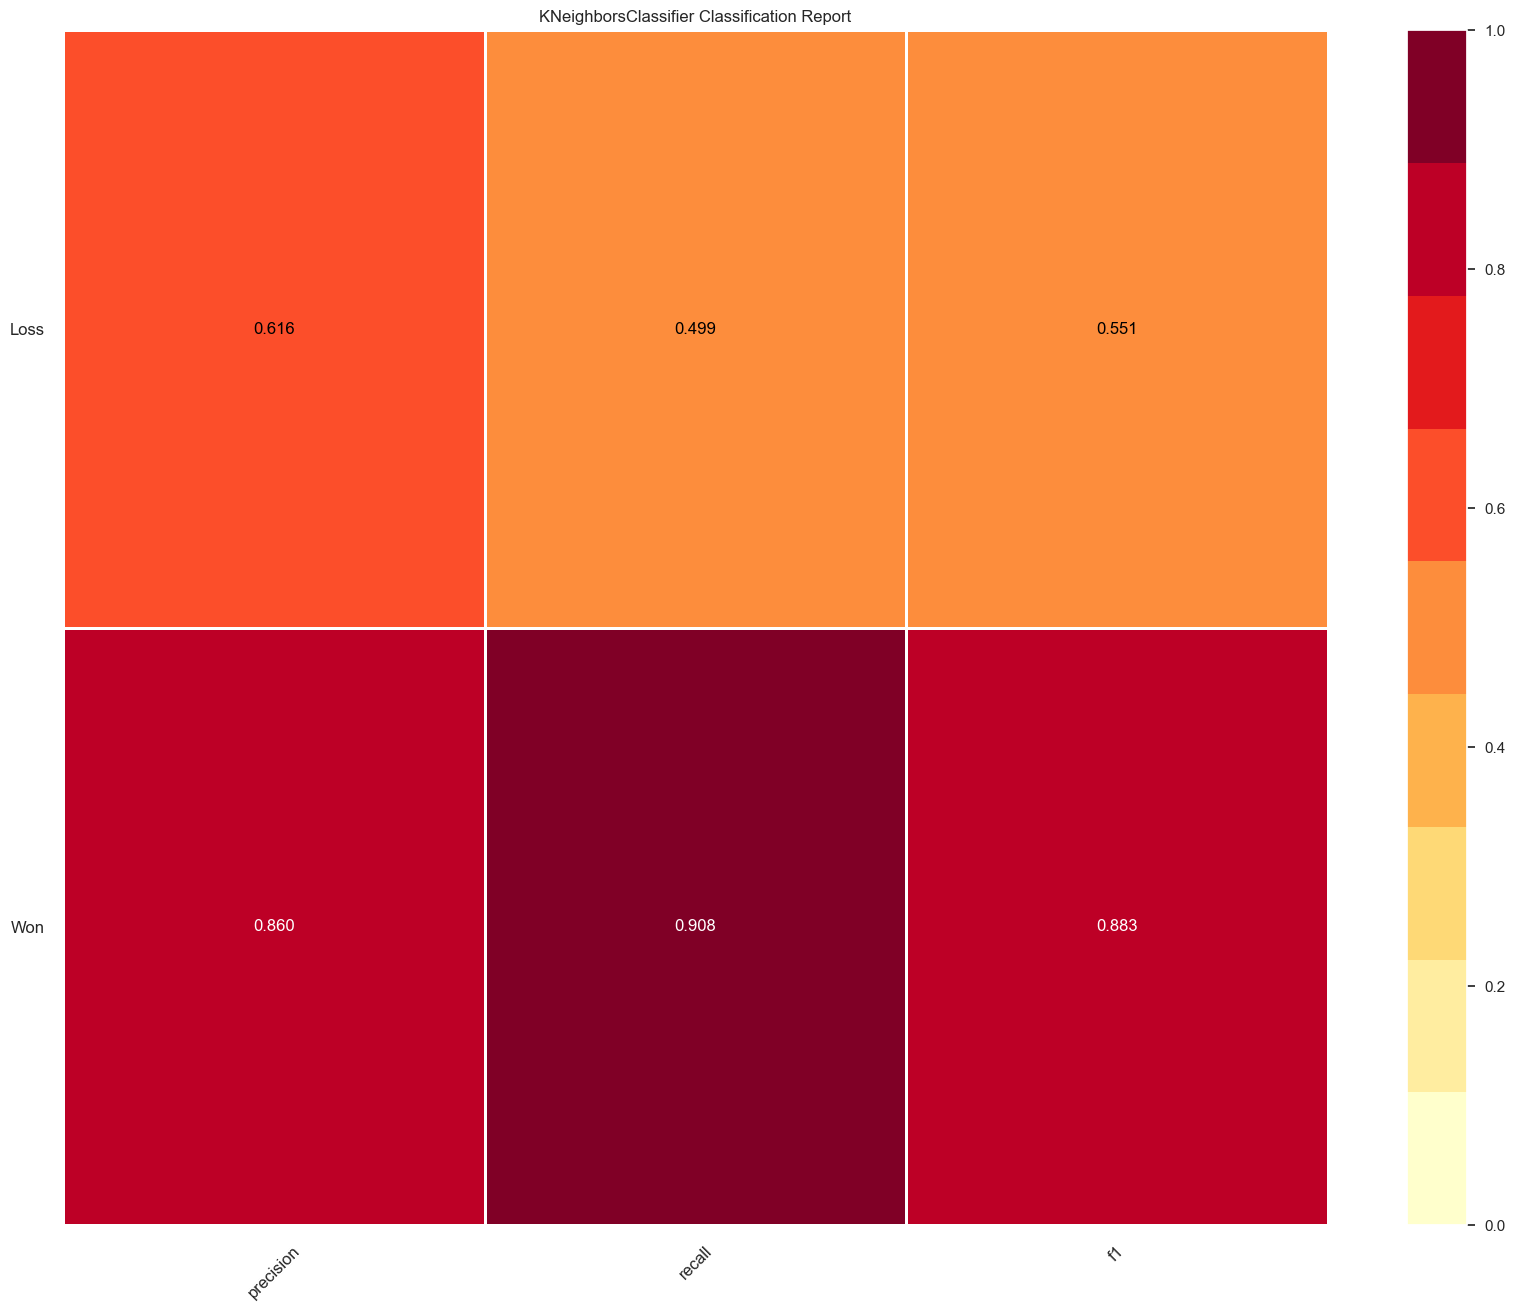

In [22]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Won','Loss'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

Once again, we first import the `ClassificationReport` class provided by the `yellowbrick.classifier` module. Next, an object `visualizer` of the type `ClassificationReport` is created. Here the first argument is the `KNeighborsClassifier` object neigh, that was created while implementing the `KNeighborsClassifier` algorithm in the ‘KNeighborsClassifier’ section. The second argument contains the labels ‘Won’ and ‘Loss’ from the ‘Opportunity Result’ column from the sales_data dataframe.

Next, we use the `fit()` method to train the ‘neigh’ object. This is followed by the `score()` method which uses the neigh object to carry out predictions according to the `KNeighborsClassifier` algorithm and then calculate the accuracy score of the predictions made by this algorithm. Finally, we use the `poof()` method to draw a plot of the different scores for the `KNeighborsClassifier` algorithm.

Now that we’ve visualized the results, it’s much easier for us to compare the scores and choose the algorithm that’s going to work best for our needs.

## Conclusion

The scikit-learn library provides many algorithms which can be imported into the code and then used to build models just like we would import any other Python library. This makes it easier to quickly build different models and compare these models to select the highest scoring one.

In this tutorial, we have only scratched the surface of what is possible with the scikit-learn library. To use this Machine Learning library to the fullest, there are many resources available on the [official page of scikit-learn](https://scikit-learn.org/) with detailed documentation that you can dive into. The quick start guide for scikit-learn can be found [here](https://scikit-learn.org/stable/tutorial/basic/tutorial.html), and that’s a good entry point for beginners who have just started exploring the world of Machine Learning.

But to really appreciate the true power of the scikit-learn library, what you really need to do is start using it on different open data sets and building predictive models using these data sets. Sources for open data sets include [Kaggle](https://www.kaggle.com/) and [Data.world](https://data.world/open-data-community). Both contain many interesting data sets on which one can practice building predictive models by using the algorithms provided by the scikit-learn library.